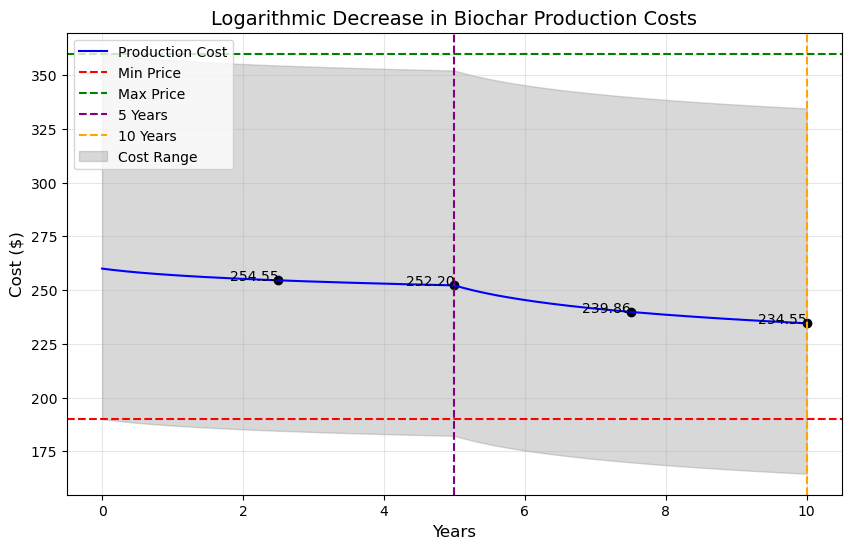

Specific Values on the Median Curve:
2.5 years: $254.55
5 years: $252.20
7.5 years: $239.86
10 years: $234.55


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Initial parameters
initial_price = 260
min_price = 190
max_price = 360

# Time periods (in years)
time_years = np.linspace(0, 10, 200)  # Generate 200 smooth points over 10 years

# Calculate the logarithmic curve parameters
# First 5 years: decrease by 3%
first_5_years_end = initial_price * (1 - 0.03)

# Next 5 years: additional 7% decrease
end_price = first_5_years_end * (1 - 0.07)

# Piecewise logarithmic function
def biochar_price(t):
    if t <= 5:
        return initial_price - (initial_price - first_5_years_end) * (np.log(1 + t) / np.log(6))
    else:
        # Adjust to smoothly continue from 5 to 10 years
        return first_5_years_end - (first_5_years_end - end_price) * (np.log(1 + t - 5) / np.log(6))

# Apply the model to generate prices
prices = np.array([biochar_price(t) for t in time_years])

# Generate minimum and maximum cost lines
min_prices = np.array([biochar_price(t) - (initial_price - min_price) for t in time_years])
max_prices = np.array([biochar_price(t) + (max_price - initial_price) for t in time_years])

# Calculate specific points on the median curve
specific_points = [2.5, 5, 7.5, 10]
specific_values = [biochar_price(t) for t in specific_points]

# Plotting
plt.figure(figsize=(10, 6))

# Plot the main price curve
plt.plot(time_years, prices, label='Production Cost', color='blue')

# Plot the min and max horizontal lines
plt.axhline(y=min_price, color='red', linestyle='--', label='Min Price')
plt.axhline(y=max_price, color='green', linestyle='--', label='Max Price')

# Add vertical reference lines
plt.axvline(x=5, color='purple', linestyle='--', label='5 Years')
plt.axvline(x=10, color='orange', linestyle='--', label='10 Years')

# Fill the area between min and max price lines
plt.fill_between(time_years, min_prices, max_prices, color='grey', alpha=0.3, label='Cost Range')

# Highlight specific points on the curve
for t, val in zip(specific_points, specific_values):
    plt.scatter(t, val, color='black')
    plt.text(t, val, f'{val:.2f}', fontsize=10, ha='right')

# Add labels and legend
plt.title('Logarithmic Decrease in Biochar Production Costs', fontsize=14)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Cost ($)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)

# Show the plot
plt.show()

# Output specific values
print("Specific Values on the Median Curve:")
for t, val in zip(specific_points, specific_values):
    print(f"{t} years: ${val:.2f}")
